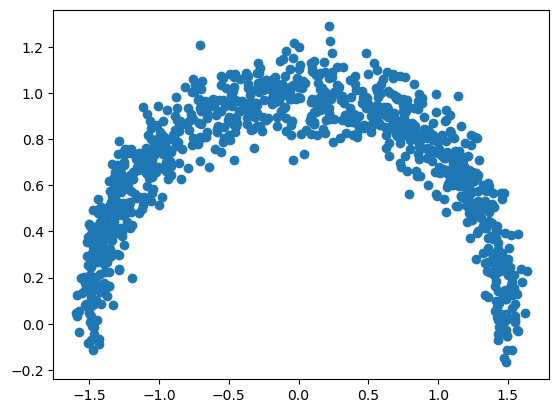

In [2]:
import h5py
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load .mat file
# For part a use 'data/points2D_Set1.mat'
file = h5py.File('D:/IIT/SOC/Week_4/points2D_Set2.mat', 'r')

# Plot to show how points are scattered
X=file['x']
Y=file['y']
plt.scatter(X,Y)
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

m = np.mean(X)
n = np.mean(Y)
print(m,n)

-0.036711629094701624 0.6526887060173189


In [4]:
X_error = X - m
Y_error = Y - n
print (X_error,Y_error)

[[ 1.32019962  1.43909847 -1.21463102  1.50905687  0.6573305  -1.43230439
  -0.9781131   0.16841703  1.50221956  1.47494021 -1.25074243  1.51443346
   1.61160108  0.04334936  1.25921403 -1.3308585  -0.27067015  1.42713312
   1.26197587  1.49112636  0.72167306 -1.48744818  1.40013512  1.46567176
   0.78223486  1.15049598  1.05307156 -0.44342939  0.72300134 -1.23806878
   0.81305673 -1.43250054 -0.83787397 -1.39557156 -1.34844707  1.29987316
   0.90760855 -0.76632315  1.52322711 -1.49603741 -0.26778301 -0.51737903
   1.12376313  1.27864582 -1.08521546 -0.07768092 -0.2120433   0.63005226
   1.01883073  1.18336863 -1.01690936  0.93645271  0.68477955 -1.26043407
  -1.30473849  0.03636188  1.63951527 -0.5466976   0.44065398 -1.20287868
   1.08333578 -1.04924114  0.02654427  0.85848116  1.45337837  1.62979298
   0.22260219 -1.33730202 -1.24298151 -0.93799602  1.37707368 -0.95828326
   1.3321055  -1.06439136  1.52127053 -0.65929881 -1.23116841 -0.98859354
   0.57489883 -0.09837005 -0.62271064 

In [5]:
covariance_matrix = np.cov(X_error,Y_error)
print (covariance_matrix)

[[1.10451066 0.01632101]
 [0.01632101 0.09798795]]


In [6]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[1.10477524 0.09772337]
Eigenvectors:
[[ 0.99986863 -0.01620885]
 [ 0.01620885  0.99986863]]


In [8]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
print(eigenvectors_sorted)
print(eigenvalues_sorted)

[[ 0.99986863 -0.01620885]
 [ 0.01620885  0.99986863]]
[1.10477524 0.09772337]


In [9]:
first_pc = eigenvectors_sorted[:, 0]
print("First Principle Component: ")
print(first_pc)

First Principle Component: 
[0.99986863 0.01620885]


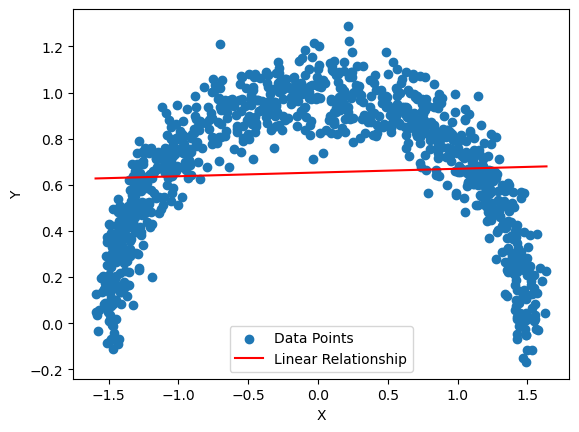

In [10]:
slope = first_pc[1] / first_pc[0]
intercept = n - slope * m

plt.scatter(X, Y, label='Data Points')

line_x = np.linspace(np.min(X), np.max(X), 100)
line_y = slope * line_x + intercept

plt.plot(line_x, line_y, color='red', label='Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()